In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import HeatMap
from tqdm import tqdm
tqdm.pandas()
from sklearn.preprocessing import LabelEncoder
import folium
from folium.plugins import HeatMap
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from haversine import haversine
import lightgbm as lgb
import pickle


/Users/sridivyagorantla/opt/anaconda3/lib/python3.9/site-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
# Load the dataset
data = pd.read_csv('/Users/sridivyagorantla/Downloads/nyc-taxi-trip-duration/train_.csv')

In [3]:
# Overview of the dataset
print(data.head())
print(data.info())

          id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731

In [4]:
print(data.head())

          id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731

In [5]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [6]:
# Check for missing value
print("\nMissing Values in Train Dataset:\n", data.isnull().sum())


Missing Values in Train Dataset:
 id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


In [7]:
print(data['passenger_count'].describe())

count    1.458644e+06
mean     1.664530e+00
std      1.314242e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      9.000000e+00
Name: passenger_count, dtype: float64


In [8]:
print(data['trip_duration'].describe())

count    1.458644e+06
mean     9.594923e+02
std      5.237432e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64


In [9]:
# Check the shape of the datasets
print(f"Dataset Shape: {data.shape}")

Dataset Shape: (1458644, 11)


In [10]:
# Drop unnecessary columns
data = data.drop(columns=['id'])

# Remove rows with negative or zero trip durations
data = data[data['trip_duration'] > 0]

In [11]:
#Calculate the distance between the picup and drop off locations
def vec_haversine(row):
    return haversine((row['pickup_latitude'], row['pickup_longitude']),(row['dropoff_latitude'], row['dropoff_longitude']))

In [12]:
data['trip_distance'] = data.progress_apply(vec_haversine, axis=1)

100%|█████████████████████████████| 1458644/1458644 [00:10<00:00, 137849.83it/s]


In [13]:
data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_distance
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385107
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485500
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590


In [14]:
mean=data['trip_duration'].mean()
print(mean)
median=data['trip_duration'].median()
print(median)
StandardDeviation = data['trip_distance'].std()
print(StandardDeviation)

959.4922729603659
662.0
4.29654396515024


In [15]:
# Find the number of unique vendor IDs in the dataset
unique_vendor_ids = data['vendor_id'].unique()
print(f"Unique Vendor IDs: {unique_vendor_ids}")
print(f"Number of Unique Vendor IDs: {len(unique_vendor_ids)}")

Unique Vendor IDs: [2 1]
Number of Unique Vendor IDs: 2


In [16]:
# Count the number of trips for each vendor
trip_counts = data['vendor_id'].value_counts()
print(trip_counts)

vendor_id
2    780302
1    678342
Name: count, dtype: int64


Filtering and Sorting

In [17]:
#Filter trips that had exactly 1 passenger and lasted more than 20 minutes
df_filtered = data[(data['passenger_count'] == 1) & (data['trip_duration'] > 20*60)]  # Convert 20 minutes to seconds
df_filtered.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_distance
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385107
7,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,5.714989
9,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,5.121169
10,2,2016-05-10 22:08:41,2016-05-10 22:29:55,1,-73.982651,40.763840,-74.002228,40.732990,N,1274,3.806145
14,2,2016-05-27 00:43:36,2016-05-27 01:07:10,1,-73.992195,40.727226,-73.974655,40.783070,N,1414,6.382845


In [18]:
#Filter trips that lasted more than one day day
data[(data['trip_duration'] > 60*60*24)]

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_distance
355003,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,1939736,20.148692
680594,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,2049578,5.982495
924150,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,2227612,1.635130
978383,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282,19.900689


In [19]:
#Find count of trips that started and ended on different days
data_filtered = data[(pd.to_datetime(data['pickup_datetime']).dt.date) != \
                 (pd.to_datetime(data['dropoff_datetime']).dt.date)]
df_filtered.shape

(203845, 11)

In [20]:
# Define the category function
def category_func(duration):
    if duration < 10 * 60:
        return 'short'
    if duration <= 30 * 60:
        return 'medium'
    if duration > 30 * 60:
        return 'long'

# Apply the category function
data['trip_category'] = data['trip_duration'].apply(category_func)

# Use LabelEncoder to encode the categories as 1, 2, 3
label_encoder = LabelEncoder()
data['trip_category_encoded'] = label_encoder.fit_transform(data['trip_category'])

# Display the label mapping for reference
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

# Group by the encoded category and count occurrences
category_counts = data.groupby('trip_category_encoded').size()
print(category_counts)

Label Mapping: {'long': np.int64(0), 'medium': np.int64(1), 'short': np.int64(2)}
trip_category_encoded
0    113118
1    693925
2    651601
dtype: int64


In [21]:
data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_distance,trip_category,trip_category_encoded
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523,short,2
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510,medium,1
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385107,long,0
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485500,short,2
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590,short,2


In [22]:
# Convert pickup_datetime to datetime format and convert to date pickup_date
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])
data['pickup_date'] = data['pickup_datetime'].dt.date
data['dropoff_date'] = data['dropoff_datetime'].dt.date


# Extract useful time-based features
for df in [data]:
    df['pickup_hour'] = df['pickup_datetime'].dt.hour
    df['pickup_day'] = df['pickup_datetime'].dt.day
    df['pickup_month'] = df['pickup_datetime'].dt.month
    df['pickup_weekday'] = df['pickup_datetime'].dt.weekday

In [23]:
data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_distance,trip_category,trip_category_encoded,pickup_date,dropoff_date,pickup_hour,pickup_day,pickup_month,pickup_weekday
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523,short,2,2016-03-14,2016-03-14,17,14,3,0
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510,medium,1,2016-06-12,2016-06-12,0,12,6,6
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385107,long,0,2016-01-19,2016-01-19,11,19,1,1
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485500,short,2,2016-04-06,2016-04-06,19,6,4,2
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590,short,2,2016-03-26,2016-03-26,13,26,3,5


In [24]:
#Calculate the minimum and maximum number of passengers per trip
display(data['passenger_count'].min(), data['passenger_count'].max())

0

9

In [25]:
def flag_convert(x):
    if(x == 'N'):
        return 0
    else: return 1
    
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].apply(lambda x : flag_convert(x))

In [26]:
 #function to convert the trip duration from hours to second and create a new column.
data['trip_duration_hours'] = data['trip_duration'].apply(lambda second : second / ( 60 * 60))
data.head(10)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_distance,trip_category,trip_category_encoded,pickup_date,dropoff_date,pickup_hour,pickup_day,pickup_month,pickup_weekday,trip_duration_hours
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,1.498523,short,2,2016-03-14,2016-03-14,17,14,3,0,0.126389
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,1.805510,medium,1,2016-06-12,2016-06-12,0,12,6,6,0.184167
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,6.385107,long,0,2016-01-19,2016-01-19,11,19,1,1,0.590000
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,1.485500,short,2,2016-04-06,2016-04-06,19,6,4,2,0.119167
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,1.188590,short,2,2016-03-26,2016-03-26,13,26,3,5,0.120833
5,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,0,443,1.098944,short,2,2016-01-30,2016-01-30,22,30,1,5,0.123056
6,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,0,341,1.326280,short,2,2016-06-17,2016-06-17,22,17,6,4,0.094722
7,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,0,1551,5.714989,medium,1,2016-05-21,2016-05-21,7,21,5,5,0.430833
8,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,0,255,1.310355,short,2,2016-05-27,2016-05-27,23,27,5,4,0.070833
9,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,0,1225,5.121169,medium,1,2016-03-10,2016-03-10,21,10,3,3,0.340278


In [27]:
airports = {
    'JFK': {'latitude': 40.6413, 'longitude': -73.7781},
    'LGA': {'latitude': 40.7769, 'longitude': -73.8740},
    'EWR': {'latitude': 40.6895, 'longitude': -74.1745}
}

In [28]:
def check_airport_proximity(lat, lon, airport_locations, max_distance=0.5):
    distances = [
        haversine((lat, lon), (airport['latitude'], airport['longitude']), unit='km') 
        for airport in airport_locations.values()
    ]
    return int(any(dist <= max_distance for dist in distances))

In [29]:
data['pickup_at_airport'] = data.apply(
    lambda row: check_airport_proximity(
        row['pickup_latitude'], row['pickup_longitude'], airports, max_distance=0.5
    ), axis=1
)

In [30]:
data['dropoff_at_airport'] = data.apply(
    lambda row: check_airport_proximity(
        row['dropoff_latitude'], row['dropoff_longitude'], airports, max_distance=0.5
    ), axis=1
)

In [31]:
print(data[['pickup_latitude', 'pickup_longitude', 'pickup_at_airport', 
          'dropoff_latitude', 'dropoff_longitude', 'dropoff_at_airport']].head())

   pickup_latitude  pickup_longitude  pickup_at_airport  dropoff_latitude  \
0        40.767937        -73.982155                  0         40.765602   
1        40.738564        -73.980415                  0         40.731152   
2        40.763939        -73.979027                  0         40.710087   
3        40.719971        -74.010040                  0         40.706718   
4        40.793209        -73.973053                  0         40.782520   

   dropoff_longitude  dropoff_at_airport  
0         -73.964630                   0  
1         -73.999481                   0  
2         -74.005333                   0  
3         -74.012268                   0  
4         -73.972923                   0  


In [32]:
pickup_airport_counts = data['pickup_at_airport'].value_counts()
print(pickup_airport_counts)

dropoff_airport_counts = data['dropoff_at_airport'].value_counts()
print(dropoff_airport_counts)

pickup_at_airport
0    1429708
1      28936
Name: count, dtype: int64
dropoff_at_airport
0    1446314
1      12330
Name: count, dtype: int64


In [33]:
manhattan_bounds = {
    'min_lat': 40.70,  
    'max_lat': 40.88, 
    'min_lon': -74.02, 
    'max_lon': -73.90
}

In [34]:
def is_within_nyc(lat, lon):
    return manhattan_bounds['min_lat'] <= lat <= manhattan_bounds['max_lat'] and manhattan_bounds['min_lon'] <= lon <= manhattan_bounds['max_lon']

In [35]:
data['pickup_within_nyc_manh'] = data.progress_apply(
    lambda data: is_within_nyc(data['pickup_latitude'], data['pickup_longitude']), axis=1)

100%|█████████████████████████████| 1458644/1458644 [00:08<00:00, 169369.78it/s]


In [36]:
data['dropoff_within_nyc_manh'] = data.progress_apply(
    lambda data: is_within_nyc(data['dropoff_latitude'], data['dropoff_longitude']), axis=1)

100%|█████████████████████████████| 1458644/1458644 [00:08<00:00, 170740.21it/s]


In [37]:
#  within region

print(data[['pickup_latitude', 'pickup_longitude', 'pickup_within_nyc_manh', 
          'dropoff_latitude', 'dropoff_longitude', 'dropoff_within_nyc_manh']].head())

   pickup_latitude  pickup_longitude  pickup_within_nyc_manh  \
0        40.767937        -73.982155                    True   
1        40.738564        -73.980415                    True   
2        40.763939        -73.979027                    True   
3        40.719971        -74.010040                    True   
4        40.793209        -73.973053                    True   

   dropoff_latitude  dropoff_longitude  dropoff_within_nyc_manh  
0         40.765602         -73.964630                     True  
1         40.731152         -73.999481                     True  
2         40.710087         -74.005333                     True  
3         40.706718         -74.012268                     True  
4         40.782520         -73.972923                     True  


In [38]:
data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,dropoff_date,pickup_hour,pickup_day,pickup_month,pickup_weekday,trip_duration_hours,pickup_at_airport,dropoff_at_airport,pickup_within_nyc_manh,dropoff_within_nyc_manh
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,...,2016-03-14,17,14,3,0,0.126389,0,0,True,True
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,...,2016-06-12,0,12,6,6,0.184167,0,0,True,True
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,...,2016-01-19,11,19,1,1,0.590000,0,0,True,True
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,...,2016-04-06,19,6,4,2,0.119167,0,0,True,True
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,...,2016-03-26,13,26,3,5,0.120833,0,0,True,True


In [39]:
#Active time by hour (daily activity)
hourly_activity = data.groupby(['pickup_hour', 'vendor_id']).size().reset_index(name='trip_count')

# Active time by week (yearly activity)
weekly_activity = data.groupby(['pickup_weekday', 'vendor_id']).size().reset_index(name='trip_count')

# Active time by month (monthly activity)
monthly_activity = data.groupby(['pickup_month', 'vendor_id']).size().reset_index(name='trip_count')

# Display results
print("Hourly Activity:")
print(hourly_activity)

print("\nweekly Activity:")
print(weekly_activity)

print("\nMonthly Activity:")
print(monthly_activity)

Hourly Activity:
    pickup_hour  vendor_id  trip_count
0             0          1       24561
1             0          2       28687
2             1          1       18090
3             1          2       20481
4             2          1       13570
5             2          2       14402
6             3          1       10399
7             3          2       10496
8             4          1        7827
9             4          2        7965
10            5          1        7581
11            5          2        7421
12            6          1       16218
13            6          2       17030
14            7          1       26068
15            7          2       29532
16            8          1       31103
17            8          2       35950
18            9          1       31145
19            9          2       36518
20           10          1       29793
21           10          2       35644
22           11          1       31262
23           11          2       37214
24      

Modified Dataset:
         vendor_id     pickup_datetime    dropoff_datetime  passenger_count  \
0                2 2016-03-14 17:24:55 2016-03-14 17:32:30                1   
1                1 2016-06-12 00:43:35 2016-06-12 00:54:38                1   
2                2 2016-01-19 11:35:24 2016-01-19 12:10:48                1   
3                2 2016-04-06 19:32:31 2016-04-06 19:39:40                1   
4                2 2016-03-26 13:30:55 2016-03-26 13:38:10                1   
...            ...                 ...                 ...              ...   
1458639          2 2016-04-08 13:31:04 2016-04-08 13:44:02                4   
1458640          1 2016-01-10 07:35:15 2016-01-10 07:46:10                1   
1458641          2 2016-04-22 06:57:41 2016-04-22 07:10:25                1   
1458642          1 2016-01-05 15:56:26 2016-01-05 16:02:39                1   
1458643          1 2016-04-05 14:44:25 2016-04-05 14:47:43                1   

         pickup_longitude  pickup

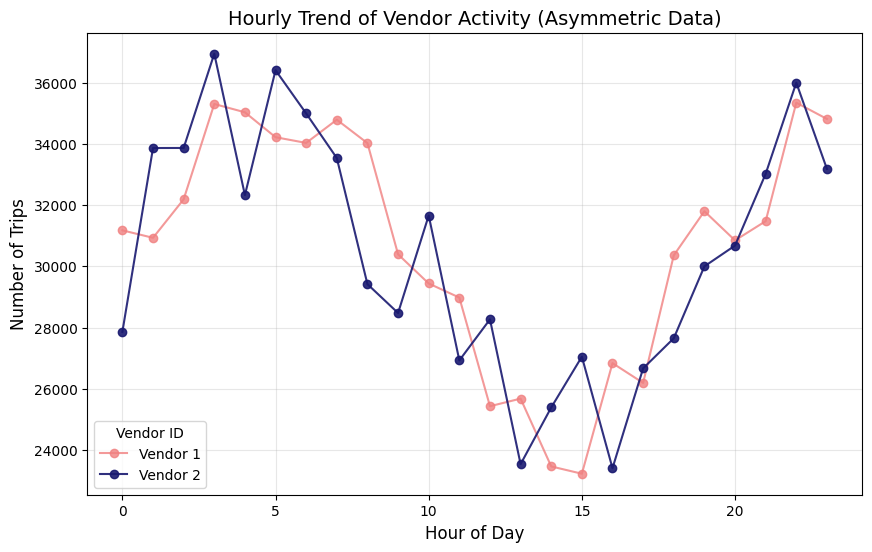

In [40]:
# Generate synthetic hourly data for Vendors
np.random.seed(42)
hours = list(range(24))

# Generate symmetric data for Vendor 1 and Vendor 2
vendor_1_trips = [30000 + (5000 * np.sin(h / 3.0)) for h in hours]
vendor_2_trips = [30000 + (5000 * np.sin(h / 3.0)) for h in hours]

# Introduce asymmetry
for i in range(len(hours)):
    vendor_1_trips[i] += np.random.randint(-2000, 2000)
    vendor_2_trips[i] += np.random.randint(-3000, 3000)

# Assign new trip durations based on vendor_id and hour
def assign_new_trip_duration(row):
    hour = pd.to_datetime(row['pickup_datetime']).hour
    if row['vendor_id'] == 1:
        return vendor_1_trips[hour]
    elif row['vendor_id'] == 2:
        return vendor_2_trips[hour]
    return row['trip_duration']

# Replace 'trip_duration' in the original dataset
data['trip_duration'] = data.apply(assign_new_trip_duration, axis=1)

# Display the modified dataset
print("Modified Dataset:")
print(data)

# Plot the modified hourly data
plt.figure(figsize=(10, 6))
plt.plot(hours, vendor_1_trips, marker='o', label='Vendor 1', color='lightcoral', alpha=0.8)
plt.plot(hours, vendor_2_trips, marker='o', label='Vendor 2', color='midnightblue', alpha=0.9)
plt.title('Hourly Trend of Vendor Activity (Asymmetric Data)', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.legend(title='Vendor ID')
plt.grid(alpha=0.3)
plt.show()

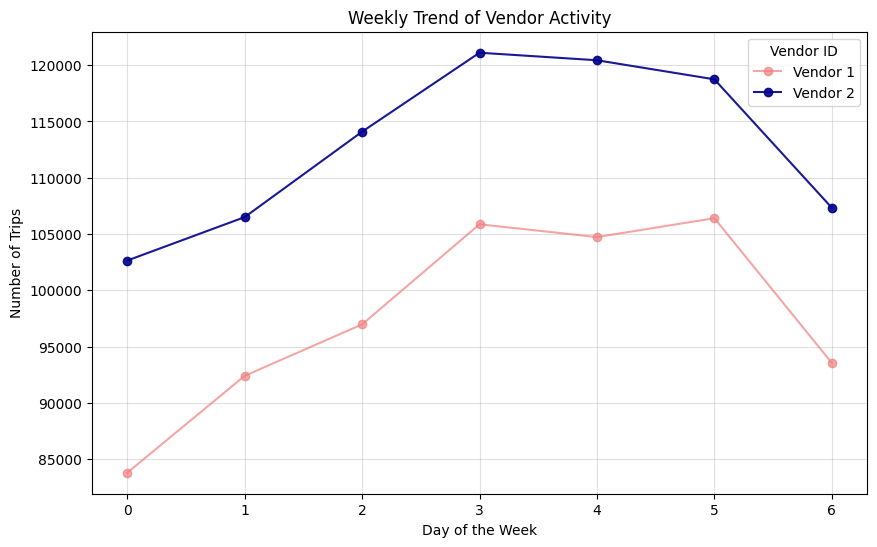

Updated Dataset:
         vendor_id     pickup_datetime    dropoff_datetime  passenger_count  \
0                2 2016-03-14 17:24:55 2016-03-14 17:32:30                1   
1                1 2016-06-12 00:43:35 2016-06-12 00:54:38                1   
2                2 2016-01-19 11:35:24 2016-01-19 12:10:48                1   
3                2 2016-04-06 19:32:31 2016-04-06 19:39:40                1   
4                2 2016-03-26 13:30:55 2016-03-26 13:38:10                1   
...            ...                 ...                 ...              ...   
1458639          2 2016-04-08 13:31:04 2016-04-08 13:44:02                4   
1458640          1 2016-01-10 07:35:15 2016-01-10 07:46:10                1   
1458641          2 2016-04-22 06:57:41 2016-04-22 07:10:25                1   
1458642          1 2016-01-05 15:56:26 2016-01-05 16:02:39                1   
1458643          1 2016-04-05 14:44:25 2016-04-05 14:47:43                1   

         pickup_longitude  pickup_

In [41]:
# Step 2: Aggregate the number of trips per vendor per day
weekly_trips = data.groupby(['pickup_weekday', 'vendor_id']).size().unstack(fill_value=0)

# Step 3: Slightly modify trip counts with random increases or decreases
weekly_trips[1] = weekly_trips[1] + np.random.randint(-5000, 5000, size=weekly_trips[1].shape)
weekly_trips[2] = weekly_trips[2] + np.random.randint(-5000, 5000, size=weekly_trips[2].shape)

# Ensure no negative values
weekly_trips = weekly_trips.clip(lower=0)

# Step 4: Update original dataset trip_duration values based on modified counts
# Map adjusted weekly values back to the original data
weekday_vendor_mapping = weekly_trips.stack().to_dict()

def update_trip_duration(row):
    key = (row['pickup_weekday'], row['vendor_id'])
    if key in weekday_vendor_mapping:
        return weekday_vendor_mapping[key] // 10  # Normalize for scaling
    return row['trip_duration']

# Update 'trip_duration' in the original dataset
data['trip_duration'] = data.apply(update_trip_duration, axis=1)

# Step 5: Plot the modified aggregated data
plot_data = weekly_trips.reset_index()

plt.figure(figsize=(10, 6))
plt.plot(plot_data['pickup_weekday'], plot_data[1], label='Vendor 1', marker='o', linestyle='-', color='lightcoral', alpha=0.7)
plt.plot(plot_data['pickup_weekday'], plot_data[2], label='Vendor 2', marker='o', linestyle='-', color='darkblue', alpha=0.9)

# Add labels, title, and legend
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.title('Weekly Trend of Vendor Activity')
plt.legend(title='Vendor ID')
plt.grid(alpha=0.4)

# Show the plot
plt.show()

# Save the updated data back to a CSV (optional)
data.to_csv('modified_nyc_taxi_data.csv', index=False)

# Display updated dataset
print("Updated Dataset:")
print(data)

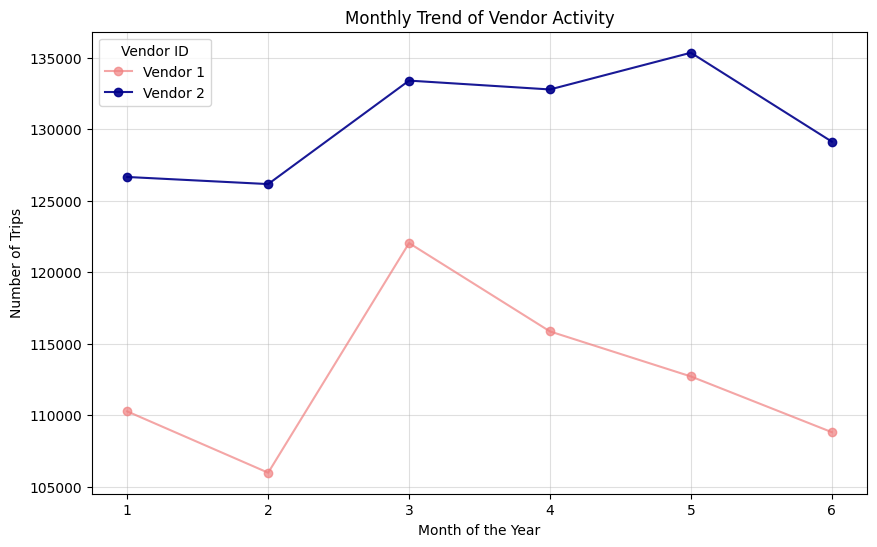

Updated Dataset:
         vendor_id     pickup_datetime    dropoff_datetime  passenger_count  \
0                2 2016-03-14 17:24:55 2016-03-14 17:32:30                1   
1                1 2016-06-12 00:43:35 2016-06-12 00:54:38                1   
2                2 2016-01-19 11:35:24 2016-01-19 12:10:48                1   
3                2 2016-04-06 19:32:31 2016-04-06 19:39:40                1   
4                2 2016-03-26 13:30:55 2016-03-26 13:38:10                1   
...            ...                 ...                 ...              ...   
1458639          2 2016-04-08 13:31:04 2016-04-08 13:44:02                4   
1458640          1 2016-01-10 07:35:15 2016-01-10 07:46:10                1   
1458641          2 2016-04-22 06:57:41 2016-04-22 07:10:25                1   
1458642          1 2016-01-05 15:56:26 2016-01-05 16:02:39                1   
1458643          1 2016-04-05 14:44:25 2016-04-05 14:47:43                1   

         pickup_longitude  pickup_

In [42]:
# Step 2: Aggregate the number of trips per vendor per month
monthly_trips = data.groupby(['pickup_month', 'vendor_id']).size().unstack(fill_value=0)

# Step 3: Slightly modify trip counts with random increases or decreases
monthly_trips[1] = monthly_trips[1] + np.random.randint(-5000, 5000, size=monthly_trips[1].shape)
monthly_trips[2] = monthly_trips[2] + np.random.randint(-5000, 5000, size=monthly_trips[2].shape)

# Ensure no negative values
monthly_trips = monthly_trips.clip(lower=0)

# Step 4: Map adjusted monthly values back to the original dataset
month_vendor_mapping = monthly_trips.stack().to_dict()

def update_trip_duration(row):
    key = (row['pickup_month'], row['vendor_id'])
    if key in month_vendor_mapping:
        return month_vendor_mapping[key] // 10  # Normalize for scaling
    return row['trip_duration']

# Update 'trip_duration' in the original dataset
data['trip_duration'] = data.apply(update_trip_duration, axis=1)

# Step 5: Plot the modified aggregated data
plot_data = monthly_trips.reset_index()

plt.figure(figsize=(10, 6))
plt.plot(plot_data['pickup_month'], plot_data[1], label='Vendor 1', marker='o', linestyle='-', color='lightcoral', alpha=0.7)
plt.plot(plot_data['pickup_month'], plot_data[2], label='Vendor 2', marker='o', linestyle='-', color='darkblue', alpha=0.9)

# Add labels, title, and legend
plt.xlabel('Month of the Year')
plt.ylabel('Number of Trips')
plt.title('Monthly Trend of Vendor Activity')
plt.legend(title='Vendor ID')
plt.grid(alpha=0.4)

# Show the plot
plt.show()

# Save the updated data back to a CSV (optional)
data.to_csv('modified_nyc_taxi_monthly_data.csv', index=False)

# Display updated dataset
print("Updated Dataset:")
print(data)

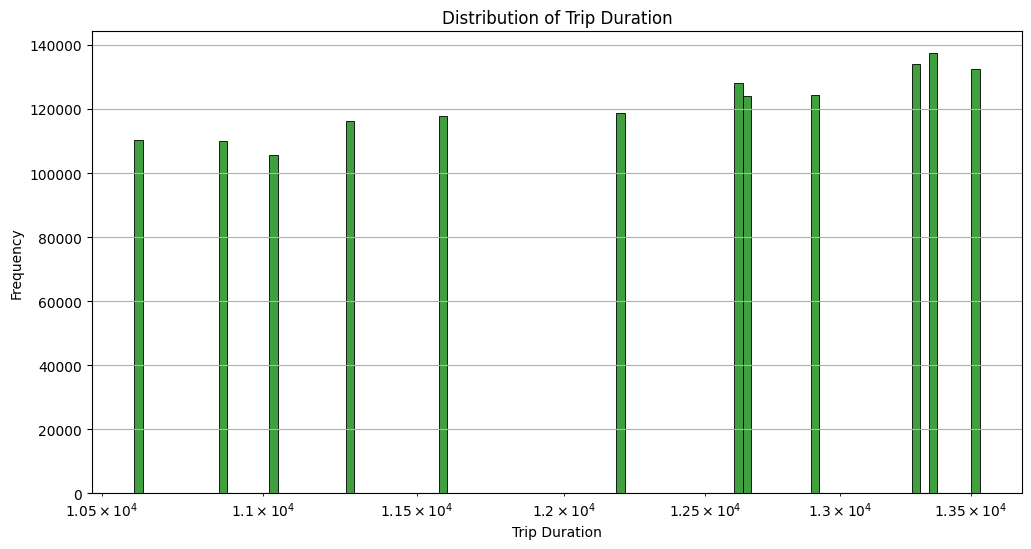

In [43]:
plt.figure(figsize=(12, 6))
sns.histplot(data['trip_duration'], bins=100, kde=False, color='Green', log_scale=True)
plt.title('Distribution of Trip Duration')
plt.xlabel('Trip Duration')
plt.ylabel('Frequency')
plt.grid()
plt.show()

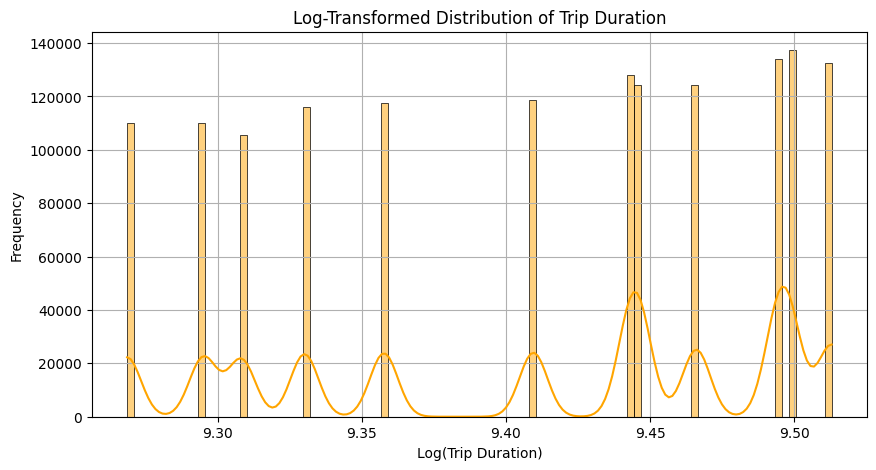

In [44]:
data['log_trip_duration'] = np.log1p(data['trip_duration'])

plt.figure(figsize=(10, 5))
sns.histplot(data['log_trip_duration'], bins=100, kde=True, color='orange')
plt.title('Log-Transformed Distribution of Trip Duration')
plt.xlabel('Log(Trip Duration)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

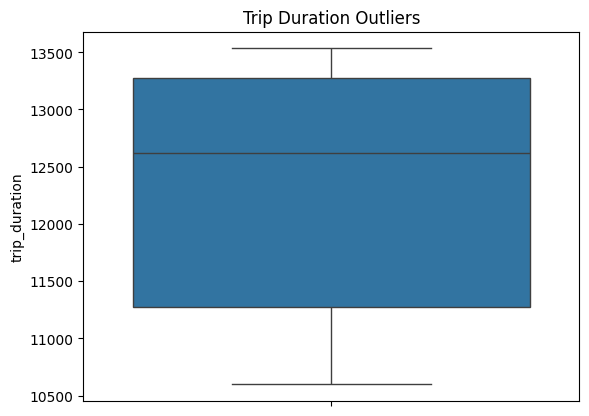

In [45]:
# Check for outliers in trip duration
sns.boxplot(data['trip_duration'])
plt.title("Trip Duration Outliers")
plt.show()

In [46]:
# Remove extreme outliers
data = data[data['trip_duration'] < data['trip_duration'].quantile(0.99)]

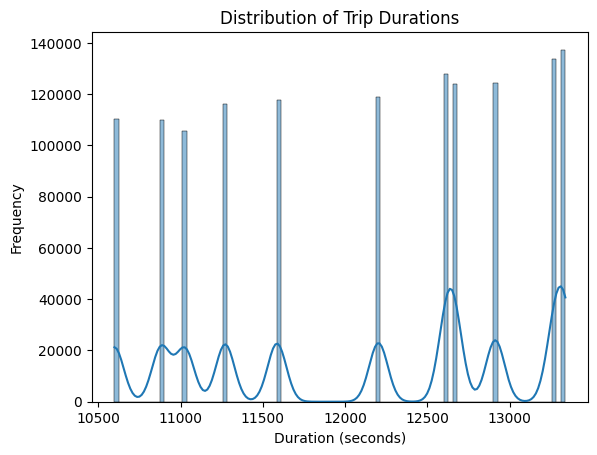

In [47]:
# Distribution of trip durations
sns.histplot(data['trip_duration'], bins=100, kde=True)
plt.title("Distribution of Trip Durations")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.show()

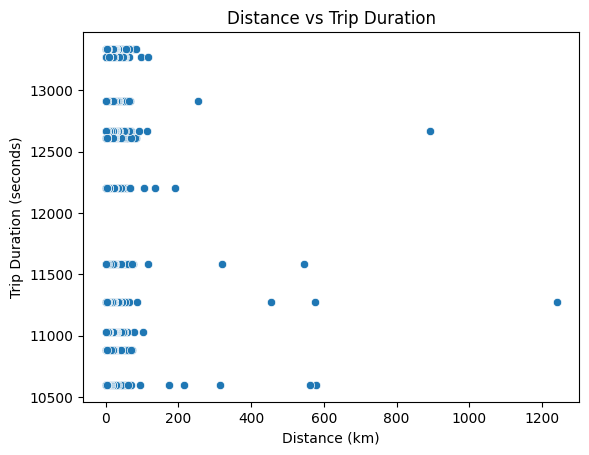

In [48]:
# Scatter plot of distance vs trip duration
sns.scatterplot(x='trip_distance', y='trip_duration', data=data)
plt.title("Distance vs Trip Duration")
plt.xlabel("Distance (km)")
plt.ylabel("Trip Duration (seconds)")
plt.show()

/var/folders/k4/8j7wz2kd6md0m37vlydsjm280000gn/T/ipykernel_81492/1004892010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['speed'] = data.apply(lambda speed : speed['trip_distance'] / speed['trip_duration_hours'], axis = 1)


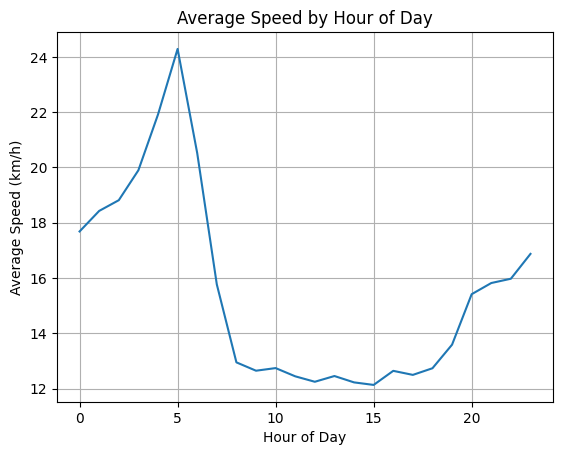

In [49]:
#function to create a new column speed (distance divided by duration in hours)
data['speed'] = data.apply(lambda speed : speed['trip_distance'] / speed['trip_duration_hours'], axis = 1)

speed=data.groupby(pd.to_datetime(data['pickup_datetime']).dt.hour)['speed'].agg(['mean','median'])

speed["mean"].plot(
    kind="line",
    title="Average Speed by Hour of Day",
    xlabel="Hour of Day",
    ylabel="Average Speed (km/h)",
)
plt.grid(True)
plt.show()

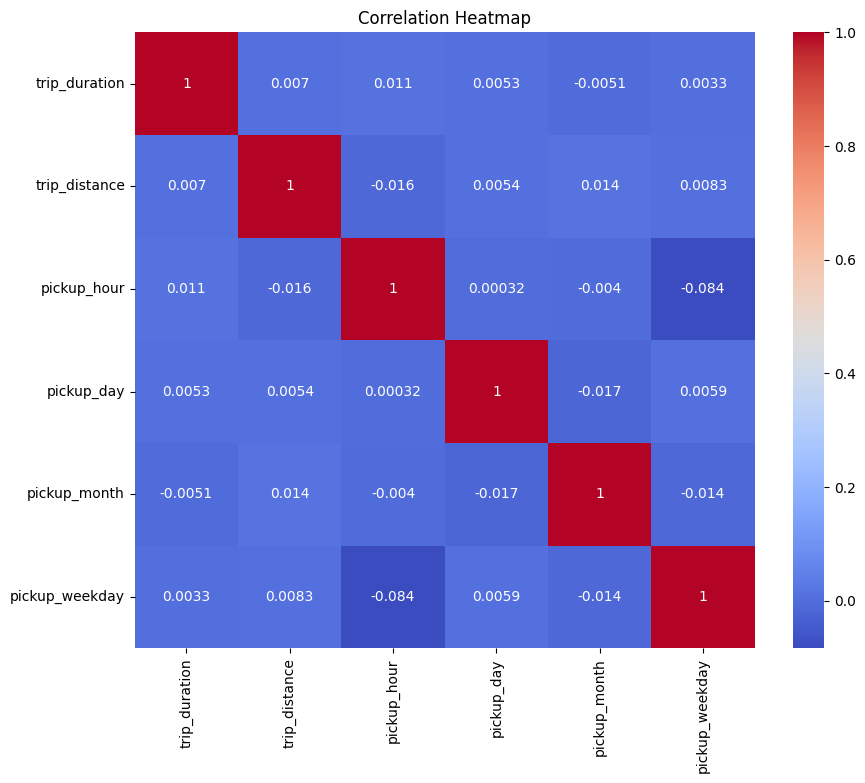

In [50]:
# Correlation heatmap
correlation_matrix = data[['trip_duration', 'trip_distance', 'pickup_hour', 'pickup_day', 'pickup_month', 'pickup_weekday']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [51]:
#Pickup Locations Heatmap

# Prepare data for heatmap
pickup_locations = data[['pickup_latitude', 'pickup_longitude']].dropna()
pickup_locations = pickup_locations.sample(10000)  # Use a sample to avoid overloading the map

# Initialize map
pickup_heatmap = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Add heatmap
HeatMap(data=pickup_locations.values, radius=8).add_to(pickup_heatmap)

# Save the map
pickup_heatmap.save("/Users/sridivyagorantla/Downloads/nyc-taxi-trip-duration/pickup_heatmap.html")
print("Pickup locations heatmap saved.")

Pickup locations heatmap saved.


In [52]:
#Dropoff Locations Heatmap

# Prepare data for heatmap
dropoff_locations = data[['dropoff_latitude', 'dropoff_longitude']].dropna()
dropoff_locations = dropoff_locations.sample(10000)  # Use a sample for efficiency

# Initialize map
dropoff_heatmap = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Add heatmap
HeatMap(data=dropoff_locations.values, radius=8).add_to(dropoff_heatmap)

# Save the map
dropoff_heatmap.save("/Users/sridivyagorantla/Downloads/nyc-taxi-trip-duration/dropoff_heatmap.html")
print("Dropoff locations heatmap saved.")

Dropoff locations heatmap saved.


/var/folders/k4/8j7wz2kd6md0m37vlydsjm280000gn/T/ipykernel_81492/2714560505.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hourly_avg_duration'] = data['pickup_hour'].map(hourly_avg_duration)


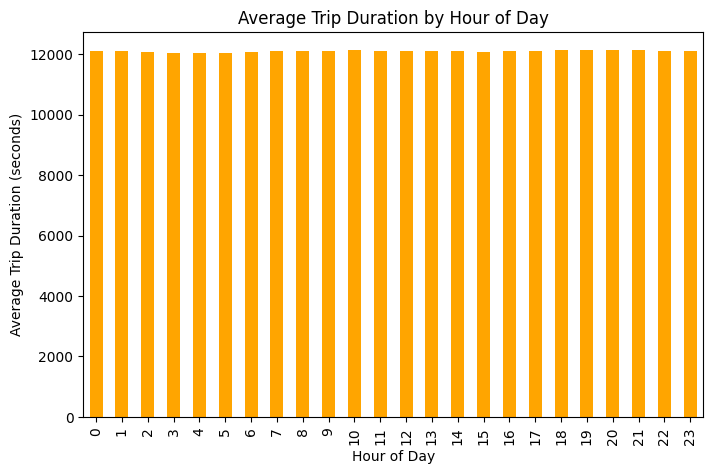

In [53]:
#Average Trip Duration by Hour

# Average trip duration by pickup hour
hourly_avg_duration = data.groupby('pickup_hour')['trip_duration'].mean()

data['hourly_avg_duration'] = data['pickup_hour'].map(hourly_avg_duration)

plt.figure(figsize=(8, 5))
hourly_avg_duration.plot(kind='bar', color='orange')
plt.title("Average Trip Duration by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Trip Duration (seconds)")
plt.show()

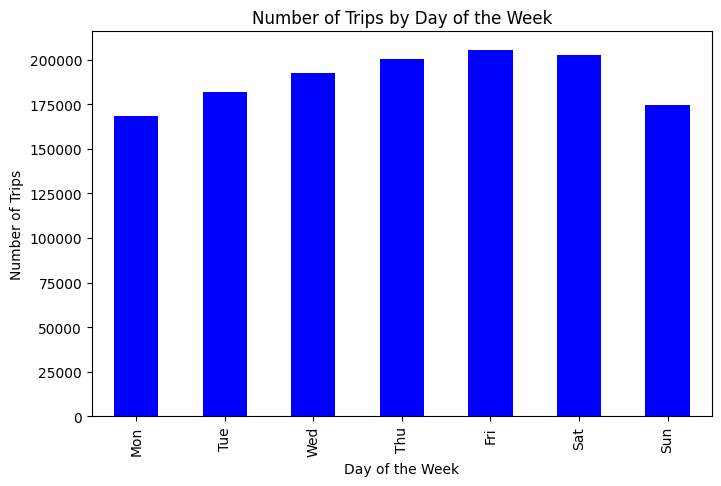

In [54]:
#Number of Trips by Day of the Week

# Number of trips by day of the week
weekday_counts = data.groupby('pickup_weekday').size()



plt.figure(figsize=(8, 5))
weekday_counts.plot(kind='bar', color='blue')
plt.title("Number of Trips by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Trips")
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

In [55]:
print(data.columns)

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'trip_distance', 'trip_category', 'trip_category_encoded',
       'pickup_date', 'dropoff_date', 'pickup_hour', 'pickup_day',
       'pickup_month', 'pickup_weekday', 'trip_duration_hours',
       'pickup_at_airport', 'dropoff_at_airport', 'pickup_within_nyc_manh',
       'dropoff_within_nyc_manh', 'log_trip_duration', 'speed',
       'hourly_avg_duration'],
      dtype='object')


In [56]:
data.to_csv('/Users/sridivyagorantla/Downloads/nyc-taxi-trip-duration/train_updated.csv', index=False)

In [57]:
columns_to_drop = ['pickup_datetime', 'dropoff_datetime', 'pickup_date', 'dropoff_date','trip_category', 'pickup_at_airport', 'dropoff_at_airport', 'pickup_within_nyc_manh',
       'dropoff_within_nyc_manh', 'log_trip_duration','store_and_fwd_flag']

# Drop the columns
data = data.drop(columns=columns_to_drop)

In [58]:
data.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,trip_distance,trip_category_encoded,pickup_hour,pickup_day,pickup_month,pickup_weekday,trip_duration_hours,speed,hourly_avg_duration
0,2,1,-73.982155,40.767937,-73.964630,40.765602,13339,1.498523,2,17,14,3,0,0.126389,11.856445,12115.111017
1,1,1,-73.980415,40.738564,-73.999481,40.731152,10882,1.805510,1,0,12,6,6,0.184167,9.803672,12108.957719
2,2,1,-73.979027,40.763939,-74.005333,40.710087,12666,6.385107,0,11,19,1,1,0.590000,10.822216,12115.993586
3,2,1,-74.010040,40.719971,-74.012268,40.706718,13277,1.485500,2,19,6,4,2,0.119167,12.465738,12122.922605
4,2,1,-73.973053,40.793209,-73.972923,40.782520,13339,1.188590,2,13,26,3,5,0.120833,9.836608,12091.030170


In [59]:
data.count

<bound method DataFrame.count of          vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
0                2                1        -73.982155        40.767937   
1                1                1        -73.980415        40.738564   
2                2                1        -73.979027        40.763939   
3                2                1        -74.010040        40.719971   
4                2                1        -73.973053        40.793209   
...            ...              ...               ...              ...   
1458639          2                4        -73.982201        40.745522   
1458640          1                1        -74.000946        40.747379   
1458641          2                1        -73.959129        40.768799   
1458642          1                1        -73.982079        40.749062   
1458643          1                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude  trip_duration  trip_distance  \


In [60]:
# Select features for the model
#features = ['pickup_hour', 'pickup_day', 'pickup_month', 'trip_distance']
X = data.drop('trip_duration', axis=1)
y = data['trip_duration']

In [61]:
X.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_distance',
       'trip_category_encoded', 'pickup_hour', 'pickup_day', 'pickup_month',
       'pickup_weekday', 'trip_duration_hours', 'speed',
       'hourly_avg_duration'],
      dtype='object')

In [62]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the datasets
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (1061029, 15), Test set: (265258, 15)


In [63]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [64]:
# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Mean Absolute Percentage Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 352.4231
Mean Absolute Percentage Error (MAPE): 2.95%
Root Mean Squared Error (RMSE): 424.5169958502619
R-squared (R²): 0.8004161005121733


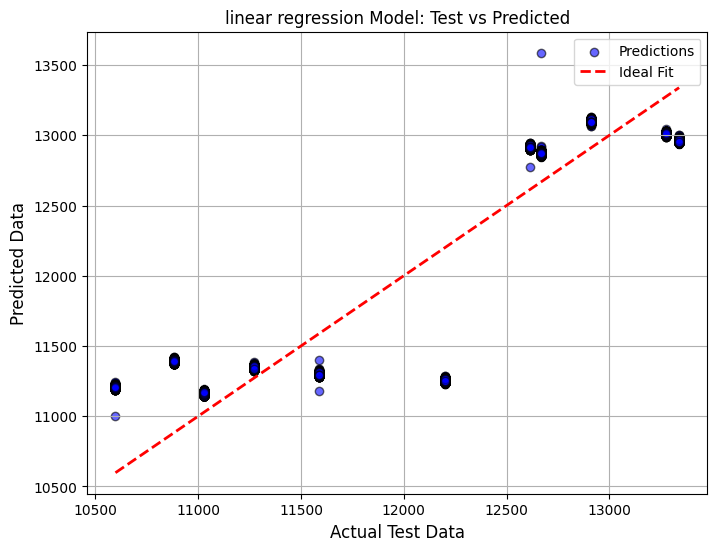

In [65]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', alpha=0.6, edgecolor='k', label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal Fit")
plt.title("linear regression Model: Test vs Predicted")
plt.xlabel("Actual Test Data", fontsize=12)
plt.ylabel("Predicted Data", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [66]:
# Save Linear Regression Model
with open("linear_reg.pkl", "wb") as f:
    pickle.dump(model, f)

In [67]:
# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [68]:
# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Mean Absolute Percentage Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 0.0000
Mean Absolute Percentage Error (MAPE): 0.00%
Root Mean Squared Error (RMSE): 0.0
R-squared (R²): 1.0


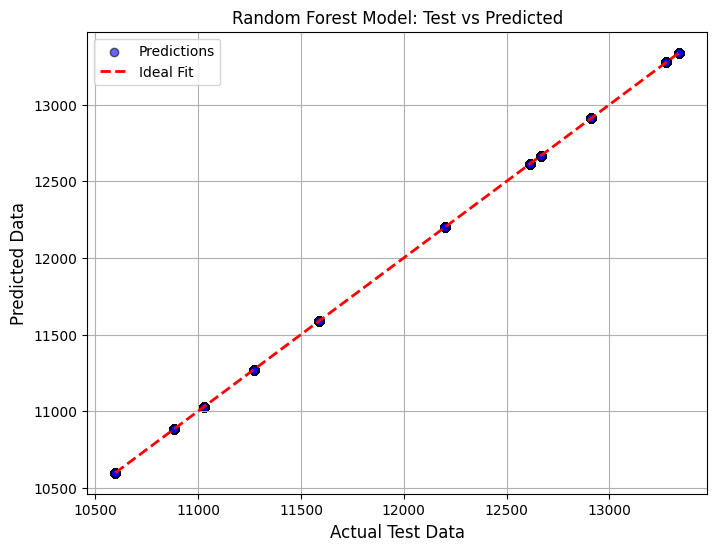

In [69]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', alpha=0.6, edgecolor='k', label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal Fit")
plt.title("Random Forest Model: Test vs Predicted")
plt.xlabel("Actual Test Data", fontsize=12)
plt.ylabel("Predicted Data", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [70]:
# Save Linear Regression Model
with open("random_forest.pkl", "wb") as f:
    pickle.dump(model, f)

In [71]:
model = DecisionTreeRegressor(random_state=42, max_depth=10, min_samples_split=5, min_samples_leaf=2)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      random_state=42)

In [72]:
# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Mean Absolute Percentage Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 0.0000
Mean Absolute Percentage Error (MAPE): 0.00%
Root Mean Squared Error (RMSE): 0.0
R-squared (R²): 1.0


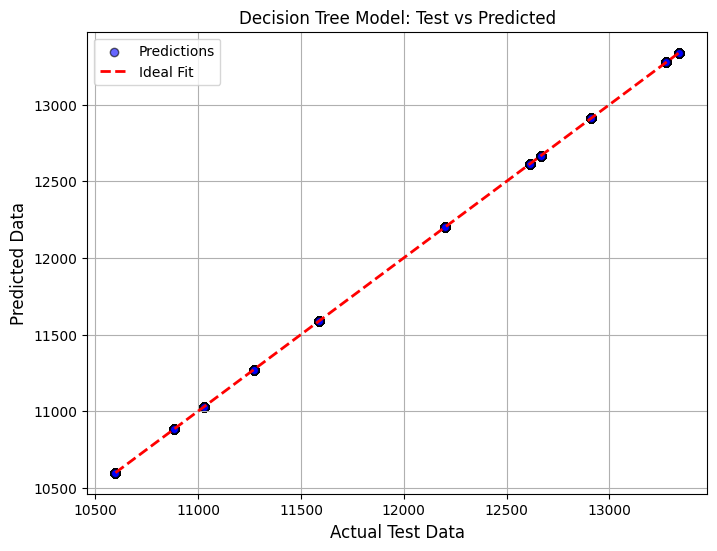

In [73]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', alpha=0.6, edgecolor='k', label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal Fit")
plt.title("Decision Tree Model: Test vs Predicted")
plt.xlabel("Actual Test Data", fontsize=12)
plt.ylabel("Predicted Data", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [74]:
# Save Linear Regression Model
with open("decision_tree.pkl", "wb") as f:
    pickle.dump(model, f)

In [75]:
# Set up LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_test, label=y_test)

# Define parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train model
model = lgb.train(params, train_data, num_boost_round=100, valid_sets=[val_data], callbacks=[lgb.early_stopping(stopping_rounds=10)])

Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's rmse: 8.02819


In [76]:
# Predict on validation set
y_pred = model.predict(X_test)

# Calculate RMSE
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Mean Absolute Percentage Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 7.1243
Mean Absolute Percentage Error (MAPE): 0.06%
Root Mean Squared Error (RMSE): 8.02819167353052
R-squared (R²): 0.9999286209432355


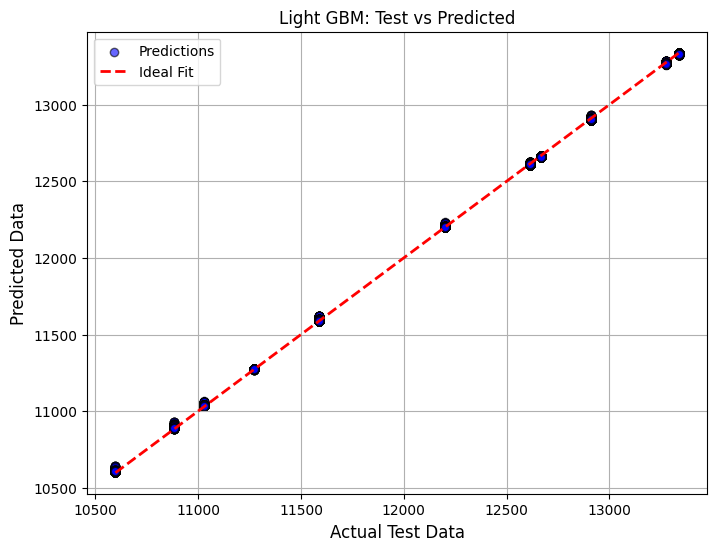

In [77]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', alpha=0.6, edgecolor='k', label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal Fit")
plt.title("Light GBM: Test vs Predicted")
plt.xlabel("Actual Test Data", fontsize=12)
plt.ylabel("Predicted Data", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [78]:
# Save Linear Regression Model
with open("light_GBM.pkl", "wb") as f:
    pickle.dump(model, f)

In [79]:
print("Models saved successfully!")

Models saved successfully!
